# Additional information needed for analysis, not included in the exercises

### This script contains the following points:

#### 1. Import libraries 
#### 2. Import data
#### 3. Question: what type of room is the most popular?
#### 4.Question: how many nights is the best time to rent?
#### 5. Question: what is the most popular price range?
#### 6. Question: top 10 most frequently rented apartments in Amsterdam?
#### 7. Question: whether you usually have one facility or several in the city?

#### 1. Import libraries 

In [38]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [39]:
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [40]:
# Creating a path for faster import and export
path=r"C:\Users\olilo\OneDrive\Dokumente\CF\Data Analytics Immersion_Week 14-15\2023-10-09 Airbnb Amsterdam"

In [41]:
# Created charts are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

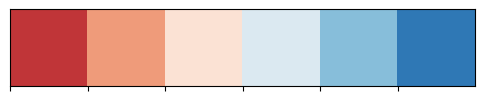

In [42]:
# Set the color palette to "RuBu"
palette = sns.color_palette("RdBu")

# Plot the palette
sns.palplot(palette)

In [43]:
# Get the color palette
colors = sns.color_palette(palette)

# Convert the colors to hexadecimal values and print them
hex_colors = [color for color in colors.as_hex()]
print(hex_colors)

['#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda', '#2f79b5']


In [44]:
#### 2. Import data

In [45]:
# Import datafarme
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

In [46]:
# Output check df_list
df.shape

(8386, 16)

In [47]:
df.head()

,Unnamed: 0,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2023-08-19,2.30,2,272,26
1,1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,2023-08-16,0.64,1,16,6
2,2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,Westerpark,52.37824,4.86826,Private room,109,2,341,2023-08-24,2.73,3,29,43
3,3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,2019-01-02,0.11,1,0,0
4,4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,Centrum-West,52.37641,4.88303,Private room,150,1,699,2023-09-01,6.62,2,196,110


In [48]:
#  Rename some columns in the imported dataframe to make it easier to type out syntax
df.rename(columns = {'number_of_reviews' : 'Reviews number', 'price':'Price', 'availability_365': 'Availability in days','minimum_nights' : 'Min. Nights', 'reviews_per_month': 'Reviews per Month', 'number_of_reviews_ltm': 'Reviews in 12 Months','room_type': 'Property for rent','neighbourhood':'Neighbourhood', 'last_review':'Last review date'}, inplace = True)

In [49]:
# Remove two columns in place
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [50]:
# Check for missing values
df.isnull().sum()

id                                  0
name                                0
host_id                             0
Neighbourhood                       0
latitude                            0
longitude                           0
Property for rent                   0
Price                               0
Min. Nights                         0
Reviews number                      0
Last review date                  830
Reviews per Month                 830
calculated_host_listings_count      0
Availability in days                0
Reviews in 12 Months                0
dtype: int64

Zero values in two columns remain.

#### 3. Question: what type of room is the most popular?

In [51]:
# Creating subset
df_room = df[['Property for rent','Price','Availability in days']]

In [52]:
# Print the unique values in the 'Property for rent' column
print(df_room['Property for rent'].unique())

# Count the number of each type of room
df_room_counts = df_room['Property for rent'].value_counts()

# Print the room counts
print(df_room_counts)

['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']
Property for rent
Entire home/apt    6477
Private room       1813
Hotel room           54
Shared room          42
Name: count, dtype: int64


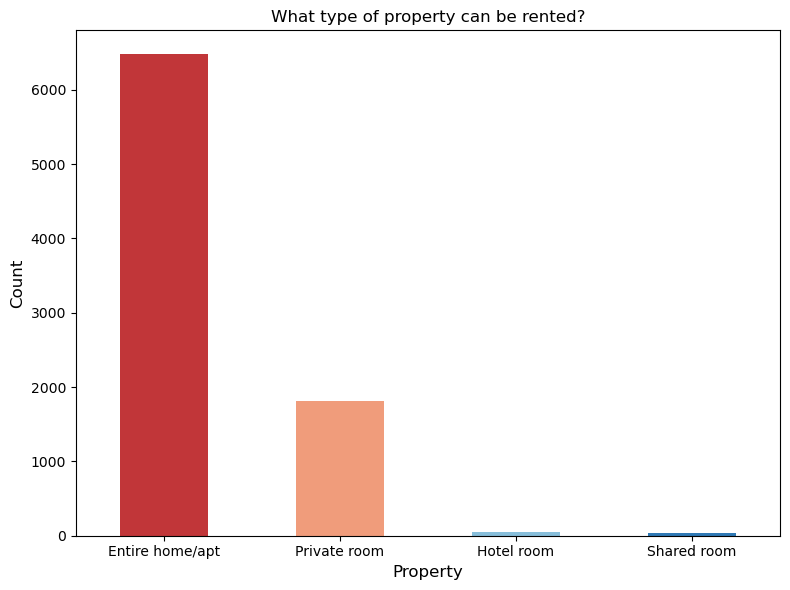

In [53]:
# Creating a bar chart
bar_room = df_room['Property for rent'].value_counts().plot.bar(
    color=['#c13639', '#f09c7b', '#87beda', '#2f79b5'],
    figsize=(8, 6))

plt.xlabel("Property", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("What type of property can be rented?", fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Adjust the layout to prevent the bottom part from getting cut off
plt.tight_layout()

In [54]:
# Export the visualization it outside
bar_room.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_room_type.png'))

In [55]:
# Identify the outliers
outliers = df_room[df_room['Price'] > 500]
# Remove the outliers
df_room = df_room.drop(outliers.index)

# Evaluate the results
print(df_room['Price'].describe())

count    7957.000000
mean      220.456076
std        99.468425
min        18.000000
25%       149.000000
50%       200.000000
75%       280.000000
max       500.000000
Name: Price, dtype: float64


In [56]:
# Define the price groups
price_groups = pd.cut(df_room['Price'], [0, 60, 120, 200, 500], labels=['18-60', '61-120', '121-200', '201-500'])

# Add the price group to the DataFrame
df_room['Price_group'] = price_groups

# Print the DataFrame
print(df_room)

     Property for rent  Price  Availability in days Price_group
0         Private room     61                   272      61-120
1      Entire home/apt    327                    16     201-500
2         Private room    109                    29      61-120
3      Entire home/apt    290                     0     201-500
4         Private room    150                   196     121-200
...                ...    ...                   ...         ...
8381   Entire home/apt    250                     9     201-500
8382   Entire home/apt    337                   267     201-500
8383   Entire home/apt    135                    13     121-200
8384      Private room    160                     6     121-200
8385   Entire home/apt    211                    55     201-500

[7957 rows x 4 columns]


In [57]:
# Data vor chart
df_room_chart = df_room[['Price_group','Availability in days']]

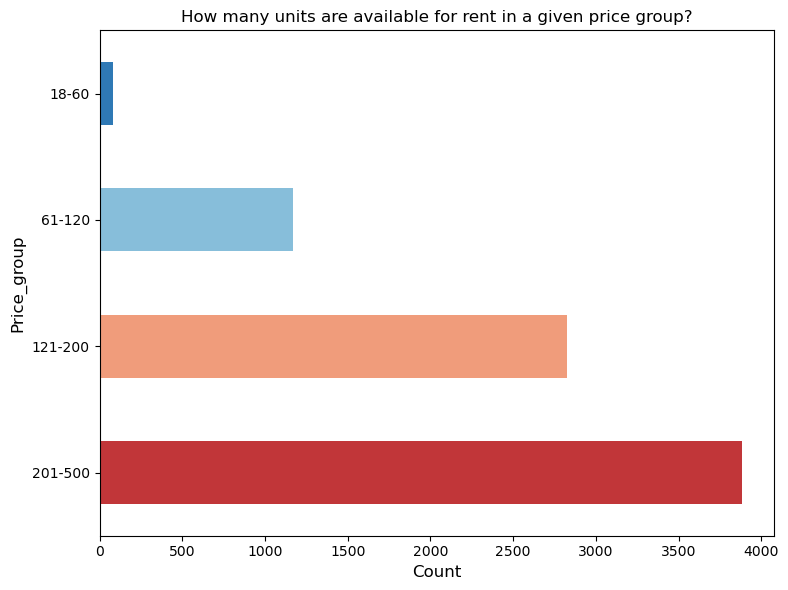

In [58]:
# Bar chart as secound output
bar_room_price_group = df_room_chart['Price_group'].value_counts().plot.barh(color = ['#c13639', '#f09c7b', '#87beda', '#2f79b5'],figsize=(8, 6))
plt.xlabel('Count', fontsize=12)
plt.ylabel('Price_group', fontsize=12)  
plt.title("How many units are available for rent in a given price group?", fontsize=12)

# Use tight_layout to prevent label overlap
plt.tight_layout()

In [59]:
# Export the visualization it outside
bar_room_price_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_room_price_group.png'))

#### 4.Question: how many nights is the best time to rent?

In [60]:
# Creating subset
df_night = df_room[['Price_group','Availability in days']]

In [61]:
# Output check
df_night.head()

,Price_group,Availability in days
0,61-120,272
1,201-500,16
2,61-120,29
3,201-500,0
4,121-200,196


In [62]:
df_night.shape

(7957, 2)

In [63]:
# Count the number 
df_night_counts = df_night['Availability in days'].value_counts()

# Print the room counts
print(df_night_counts)

Availability in days
0      2871
2       138
1       119
3       102
4        98
       ... 
147       3
188       3
141       2
113       2
207       1
Name: count, Length: 366, dtype: int64


In [64]:
# Sort the counts in ascending order
df_night_counts = df_night_counts.sort_values(ascending=True)

# Print the top 10 lowest counted values
print(df_night_counts.head(10))

Availability in days
207    1
113    2
141    2
188    3
187    3
341    3
199    3
266    3
219    3
165    3
Name: count, dtype: int64


C:\Users\olilo\AppData\Local\Temp\ipykernel_5256\4126811380.py:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  scatter_night = sns.scatterplot(x = 'Price_group', y = 'Availability in days', data = df_night, hue='Price_group', palette=colors)


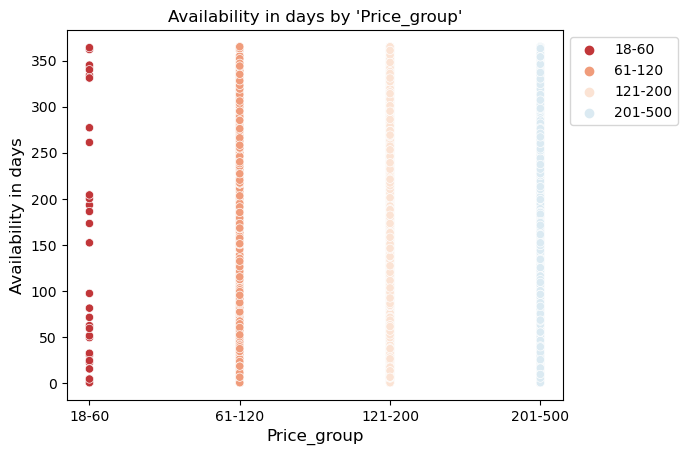

In [65]:
# Create a scatterplot
scatter_night = sns.scatterplot(x = 'Price_group', y = 'Availability in days', data = df_night, hue='Price_group', palette=colors)
plt.xlabel('Price_group', fontsize=12)
plt.ylabel('Availability in days', fontsize=12)  
plt.title("Availability in days by 'Price_group'", fontsize=12)
# Move the legend to the side
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

In [66]:
# Export the visualization it outside
scatter_night.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_night_groups_price.png'))

#### 5. Question: what is the most popular price range?

Answer in bar_room_price_group chart

#### 6. Question: top 10 most frequently rented apartments in Amsterdam?

In [67]:
# Output for easy workflow
df.head()

,id,name,host_id,Neighbourhood,latitude,longitude,Property for rent,Price,Min. Nights,Reviews number,Last review date,Reviews per Month,calculated_host_listings_count,Availability in days,Reviews in 12 Months
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2023-08-19,2.30,2,272,26
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,2023-08-16,0.64,1,16,6
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,Westerpark,52.37824,4.86826,Private room,109,2,341,2023-08-24,2.73,3,29,43
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,2019-01-02,0.11,1,0,0
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,Centrum-West,52.37641,4.88303,Private room,150,1,699,2023-09-01,6.62,2,196,110


In [68]:
# Find the top 10 apartments with the highest number of reviews
top_10_apartments_by_reviews = df.nlargest(10, 'Reviews number')

# Print the results
print(top_10_apartments_by_reviews)

            id                                               name    host_id  \
4746  50383849  Hotel in Amsterdam · ★4.66 · 1 bedroom · 1 bed...  407017762   
3382  32485135     Hotel in Amsterdam · ★4.84 · 1 bedroom · 1 bed  243087395   
4396  45045046  Boutique hotel in Amsterdam · ★4.74 · 1 bedroo...  363404652   
3657  35927687  Hostel in Amsterdam · ★4.51 · 1 bedroom · 2 be...  251479377   
159     802052  Boat in Amsterdam · ★4.93 · 1 bedroom · 1 bed ...    4221960   
23       82482  Guesthouse in Amsterdam · ★4.51 · Studio · 2 b...     186729   
155     785432  Rental unit in Amsterdam · ★4.77 · 2 bedrooms ...    2586026   
3244  30762441  Serviced apartment in Amsterdam · ★4.78 · 2 be...  228208519   
166     851044  Rental unit in Amsterdam · ★4.75 · 2 bedrooms ...    4443833   
3629  35632344  Hostel in Amsterdam · ★4.60 · 1 bedroom · 4 be...  251479377   

               Neighbourhood  latitude  longitude Property for rent  Price  \
4746                  Osdorp  52.35831   

In [69]:
# Print the column names of the DataFrame
print(top_10_apartments_by_reviews.columns)

Index(['id', 'name', 'host_id', 'Neighbourhood', 'latitude', 'longitude',
       'Property for rent', 'Price', 'Min. Nights', 'Reviews number',
       'Last review date', 'Reviews per Month',
       'calculated_host_listings_count', 'Availability in days',
       'Reviews in 12 Months'],
      dtype='object')


C:\Users\olilo\AppData\Local\Temp\ipykernel_5256\4234899583.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


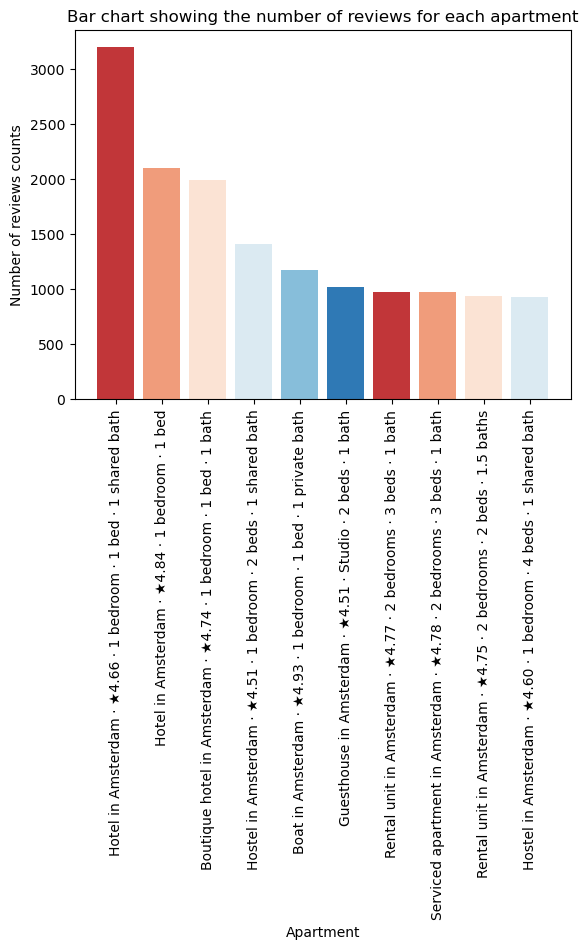

In [70]:
# Sort the DataFrame by the number of reviews
top_10_apartments_by_reviews = top_10_apartments_by_reviews.sort_values(by='Reviews number', ascending=False)

# Create a bar chart
plt.bar(top_10_apartments_by_reviews['name'], top_10_apartments_by_reviews['Reviews number'], color=['#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda', '#2f79b5'])

plt.xlabel('Apartment')
plt.ylabel('Number of reviews counts')
plt.title('Bar chart showing the number of reviews for each apartment')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

# Adjust the layout to prevent the bottom part from getting cut off
plt.tight_layout()

plt.show()

In [71]:
# Adjust the layout to prevent the bottom part from getting cut off
plt.tight_layout()

# Save the bar chart to a PNG file
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_10_apartments_by_reviews.png'))

<Figure size 640x480 with 0 Axes>

In [72]:
# Find the top 10 apartments with the lowest values in the 'Availability in days' column
top_10_apartments_by_availability = df.nsmallest(10, 'Availability in days')

# Print the results
print(top_10_apartments_by_availability)

        id                                               name  host_id  \
3   771217  Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...  4068486   
13   44391  Rental unit in Amsterdam · ★4.72 · 2 bedrooms ...   194779   
21   62015  Rental unit in Amsterdam · ★4.91 · 1 bedroom ·...   301340   
22   80635  Home in Amsterdam · ★4.77 · 1 bedroom · 1 bed ...   436145   
28  155548  Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...   748161   
31  168769  Boutique hotel in Amsterdam · ★4.59 · 1 bedroo...   436145   
32  171054  Rental unit in Amsterdam · ★4.75 · 2 bedrooms ...   815989   
35  190943  Rental unit in Amsterdam · ★4.46 · 2 bedrooms ...   922787   
37  212050  Rental unit in Amsterdam · ★4.70 · 2 bedrooms ...   887591   
38  213371  Rental unit in Amsterdam · ★4.83 · 3 bedrooms ...  1100324   

              Neighbourhood  latitude  longitude Property for rent  Price  \
3                      Zuid  52.34091    4.84802   Entire home/apt    290   
13             Centrum-Oost  52

In [73]:
# Filter the DataFrame to show all rows with 0 value in the 'aviability_365' column
df_filtered = df[df['Availability in days'] == 0]

# Print the filtered DataFrame
print(df_filtered)

                      id                                               name  \
3                 771217  Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...   
13                 44391  Rental unit in Amsterdam · ★4.72 · 2 bedrooms ...   
21                 62015  Rental unit in Amsterdam · ★4.91 · 1 bedroom ·...   
22                 80635  Home in Amsterdam · ★4.77 · 1 bedroom · 1 bed ...   
28                155548  Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...   
...                  ...                                                ...   
8167  949656437007365910  Rental unit in Amsterdam · ★New · 2 bedrooms ·...   
8169  949735155282331196  Rental unit in Amsterdam · ★New · 1 bedroom · ...   
8174  949814122808894523  Condo in Amsterdam · ★4.55 · 1 bedroom · 1 bed...   
8286  959333340597647744  Condo in Amsterdam · ★New · 1 bedroom · 1 bed ...   
8308  960839346651335772  Rental unit in Amsterdam · ★New · 1 bedroom · ...   

        host_id            Neighbourhood   latitude

#### 7. Question: whether you usually have one facility or several in the city?

In [74]:
# Output for easy workflow
df.head()

,id,name,host_id,Neighbourhood,latitude,longitude,Property for rent,Price,Min. Nights,Reviews number,Last review date,Reviews per Month,calculated_host_listings_count,Availability in days,Reviews in 12 Months
0,761411,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,4013546,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2023-08-19,2.30,2,272,26
1,768274,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,3678216,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,2023-08-16,0.64,1,16,6
2,768737,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,3877342,Westerpark,52.37824,4.86826,Private room,109,2,341,2023-08-24,2.73,3,29,43
3,771217,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,4068486,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,2019-01-02,0.11,1,0,0
4,771343,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,2313061,Centrum-West,52.37641,4.88303,Private room,150,1,699,2023-09-01,6.62,2,196,110


In [75]:
# Create a subset
sub_host=df[['host_id','calculated_host_listings_count']]

In [76]:
# Count the number 
sub_host_id =sub_host['host_id'].value_counts()

# Print the room counts
print(sub_host_id)

host_id
4456680      27
203731852    22
14574533     21
46691672     17
364305280    17
             ..
14229551      1
6472394       1
90747703      1
43718573      1
2876582       1
Name: count, Length: 7269, dtype: int64


In [77]:
# Count the number of hosts in each group
sub_host_count = sub_host['calculated_host_listings_count'].value_counts(ascending=True)

# Print the room counts
print(sub_host_count)

calculated_host_listings_count
10      20
21      21
22      22
11      22
12      24
27      27
8       32
17      34
14      42
9       72
7       77
6       84
5      100
4      120
3      228
2      738
1     6723
Name: count, dtype: int64


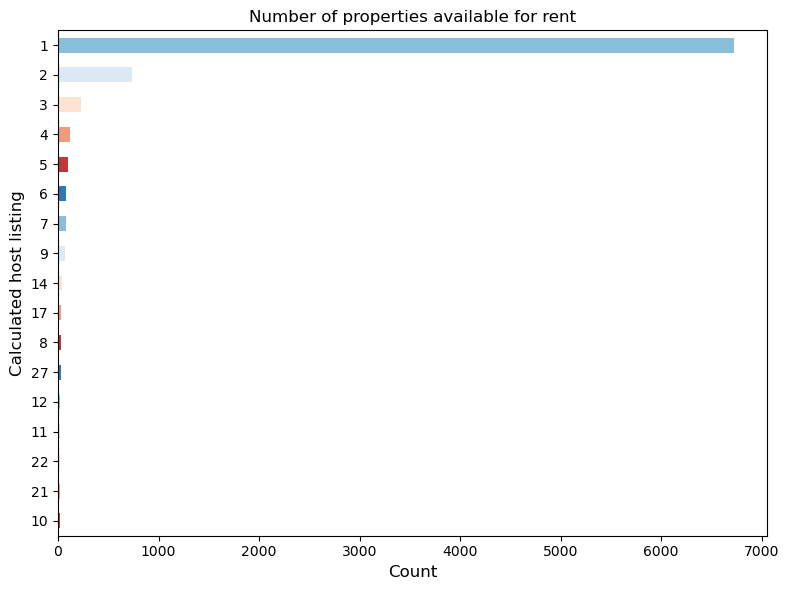

In [78]:
# Bar chart as second output
bar_host_count = sub_host_count.plot(kind='barh', color=['#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda', '#2f79b5'], figsize=(8, 6))

# Set the labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Calculated host listing', fontsize=12)
plt.title("Number of properties available for rent", fontsize=12)

# Use tight_layout to prevent label overlap
plt.tight_layout()

In [79]:
# Export the visualization it outside
bar_host_count.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_host_count.png'))

In [80]:
# Export the DataFrame to an Excel file
df.to_excel('my_data.xlsx', index=False)
# Export data
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'data_to_work.csv'))